In [57]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from numpy.random import normal
import math
import usefulFunctions
from usefulFunctions import checkForNull
from IPython.core.debugger import Tracer
import random
import numpy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# loading in the data and splitting it up into control vs affected, male vs female as well as by age
control = {}
affected = {}
male = {}
female = {}
young_age = {}    # younger than 50
middle_1_age = {} # between 50 and 60
middle_2_age = {} # between 60 and 65
middle_3_age = {} # between 65 and 70
old_age = {}      # older than 70


age = []
months = []

fileName = "Master_PL.xlsx - Master_PL.csv"
table = pd.read_csv(fileName, header=0, 
                    names=["id", "type", "gender", "age", "monthsFromScreening", "protein_BL", "protein_V4",
                          "protein_V6", "protein_V8", "protein_V10", "protein_V12"])

totalRows = len(table.values)

# splitting data into female vs male, control vs affected, plus storing the age and months data
# into arrays so we can look at their distributions later (to understand good age bands)
for row in table.to_dict(orient='records'):
    if not checkForNull(row['type']):
        if row['type'] == 1:
            control[int(row['id'])] = row
        else:
            affected[int(row['id'])] = row
    
    if not checkForNull(row['gender']):
        if row['gender'] == 1:
            female[int(row['id'])] = row
        else:
            male[int(row['id'])] = row
    
    if not checkForNull(row['age']):
        if row['age']< 50:
            young_age[int(row['id'])] = row
        elif row['age'] < 60:
            middle_1_age[int(row['id'])] = row
        elif row['age'] < 65:
            middle_2_age[int(row['id'])] = row
        elif row['age'] < 70:
            middle_3_age[int(row['id'])] = row
        else:
            old_age[int(row['id'])] = row

    
    if row['age'] is not None:
        age.append(row['age'])
    
    if row['monthsFromScreening'] is not None:
        months.append(row['monthsFromScreening'])

print "Number of data points that are males : " + str(len(male))
print "Number of data points that are females : " + str(len(female))
print "Number of data points that are control : " + str(len(control))
print "Number of data points that are affected : " + str(len(affected))
print "Number of young : " + str(len(young_age))
print "Number of middle_1 : " + str(len(middle_1_age))
print "Number of middle_2 : " + str(len(middle_2_age))
print "Number of middle_3 : " + str(len(middle_3_age))
print "Number of old : " + str(len(old_age))

Number of data points that are males : 403
Number of data points that are females : 216
Number of data points that are control : 196
Number of data points that are affected : 423
Number of young : 78
Number of middle_1 : 168
Number of middle_2 : 118
Number of middle_3 : 119
Number of old : 136


In [3]:
tup = usefulFunctions.combine(male, female, control, affected)
maleSplit = tup[0]
femaleSplit = tup[1]
print "Number of Males that are in the Control : " + str(len(maleSplit[0]))
print "Number of Males that are Affected : " + str(len(maleSplit[1]))
print "Number of Females that are in the Control : " + str(len(femaleSplit[0]))
print "Number of Females that are Affected : " + str(len(femaleSplit[1]))

Number of Males that are in the Control : 126
Number of Males that are Affected : 277
Number of Females that are in the Control : 70
Number of Females that are Affected : 146


Total Data Points: 216
Number of Training Data Points: 82
Number of Testing Data Points: 41
Mean Accuracy: 0.723902439024
Stdev of Accuracy: 0.0813658276631
Median Accuracy: 0.731707317073
Counts for how many times each feature was filled in: {0: {0: 0, 1: 0}, 1: {0: 5, 1: 8}, 2: {0: 5, 1: 6}, 3: {0: 6, 1: 3}, 4: {0: 13, 1: 29}, 5: {0: 18, 1: 61}}
Average Feature Importances: {0: 0.095645820133001519, 1: 0.15385774327385118, 2: 0.17085509662440659, 3: 0.11864247655264894, 4: 0.16328729074525064, 5: 0.29771157267084125}
ROC Graph for Median trial


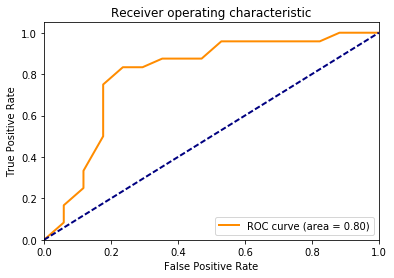

In [83]:
# classifying control vs affected for females... Filling in data points by taking into account affected_status
# affected is class 1
# fill = True, k = 2, fix = True, morePoints = True, differ = True, proteins = None

clf = RandomForestClassifier(n_estimators=30, random_state=1)
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
scores1, y_true, y_pred = usefulFunctions.testBinaryClassifier(clf, femaleSplit[0], femaleSplit[1], n=100, testSize=0.33, k=2, morePoints=True)


Total Data Points: 216
Number of Training Data Points: 82
Number of Testing Data Points: 41
Mean Accuracy: 0.566097560976
Stdev of Accuracy: 0.0626208204321
Median Accuracy: 0.560975609756
Counts for how many times each feature was filled in: {0: 0, 1: 13, 2: 11, 3: 9, 4: 42, 5: 79}
Average Feature Importances: {0: 0.12254009938689084, 1: 0.18985552650774154, 2: 0.20052277560771206, 3: 0.15402889085148053, 4: 0.15825104412500343, 5: 0.1748016635211716}
ROC Graph for Median trial


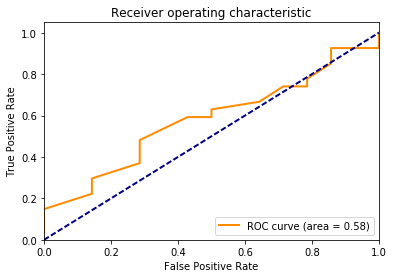

In [84]:
# classifying control vs affected for females... Not filling in data points by taking into account affected_status
# affected is class 1
# fill = True, k = 2, fix = True, morePoints = True, differ = False, proteins = None

clf = RandomForestClassifier(n_estimators=30, random_state=1)
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
scores2, y_true, y_pred = usefulFunctions.testBinaryClassifier(clf, femaleSplit[0], femaleSplit[1], testSize=0.33, n=100, k=2, morePoints=True, differ=False)


In [85]:
print usefulFunctions.computeWelchTest(scores1, scores2)

Ttest_indResult(statistic=15.369642199185316, pvalue=6.1700430688186977e-35)


Total Data Points: 216
Number of Training Data Points: 82
Number of Testing Data Points: 41
Mean Accuracy: 0.737073170732
Stdev of Accuracy: 0.0712636419284
Median Accuracy: 0.731707317073
Counts for how many times each feature was filled in: {0: {0: 0, 1: 0}, 1: {0: 5, 1: 8}, 2: {0: 5, 1: 6}, 3: {0: 6, 1: 3}, 4: {0: 13, 1: 29}, 5: {0: 18, 1: 61}}
Average Feature Importances: {0: 0.096199999999999994, 1: 0.13180000000000006, 2: 0.16390000000000002, 3: 0.14599999999999999, 4: 0.16340000000000005, 5: 0.29870000000000008}
ROC Graph for Median trial


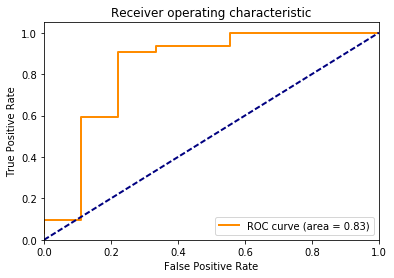

In [86]:
# classifying control vs affected for females... Filling in data points by taking into account affected_status
# affected is class 1
# fill = True, k = 2, fix = True, morePoints = True, differ = True, proteins = None

clf = AdaBoostClassifier(n_estimators=100)
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
scores1, y_test, y_pred = usefulFunctions.testBinaryClassifier(clf, femaleSplit[0], femaleSplit[1], testSize=0.33, n=100, k=2, morePoints=True)


Total Data Points: 216
Number of Training Data Points: 82
Number of Testing Data Points: 41
Mean Accuracy: 0.551951219512
Stdev of Accuracy: 0.0740811392365
Median Accuracy: 0.536585365854
Counts for how many times each feature was filled in: {0: 0, 1: 13, 2: 11, 3: 9, 4: 42, 5: 79}
Average Feature Importances: {0: 0.12699999999999997, 1: 0.1642000000000001, 2: 0.18090000000000001, 3: 0.17660000000000006, 4: 0.17050000000000007, 5: 0.18080000000000004}
ROC Graph for Median trial


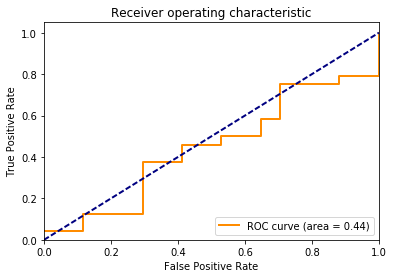

In [87]:
# classifying control vs affected for females... Not filling in data points by taking into account affected_status
# affected is class 1
# fill = True, k = 2, fix = True, morePoints = True, differ = False, proteins = None

clf = AdaBoostClassifier(n_estimators=100)
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
scores2, y_test, y_pred = usefulFunctions.testBinaryClassifier(clf, femaleSplit[0], femaleSplit[1], testSize=0.33, n=100, k=2, morePoints=True, differ=False)


In [11]:
print usefulFunctions.computeWelchTest(scores1, scores2)

Ttest_indResult(statistic=21.257149465849306, pvalue=1.7347694746337791e-52)


In [19]:
randomControlFemale = {}
randomAffectedFemale = {}

for key in female:
    if random.random() < 0.5:
        randomControlFemale[key] = female[key]
    else:
        randomAffectedFemale[key] = female[key]
print len(randomControlFemale)
print len(randomAffectedFemale)

105
111


Total Data Points: 216
Number of Training Data Points: 82
Number of Testing Data Points: 41
Mean Accuracy: 0.736097560976
Stdev of Accuracy: 0.0627248477726
Median Accuracy: 0.731707317073
Counts for how many times each feature was filled in: {0: {0: 0, 1: 0}, 1: {0: 10, 1: 3}, 2: {0: 6, 1: 5}, 3: {0: 6, 1: 3}, 4: {0: 20, 1: 22}, 5: {0: 39, 1: 40}}
Average Feature Importances: {0: 0.089757353359114875, 1: 0.12260600615493682, 2: 0.13172749126439418, 3: 0.11846244002915597, 4: 0.21481620776722171, 5: 0.32263050142517657}
ROC Graph for Median trial


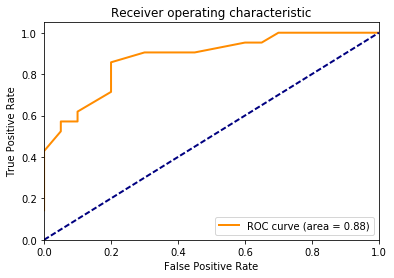

In [88]:
# classifying (random) control vs affected for females... Filling in data points by taking into account affected_status
# affected is class 1
# fill = True, k = 2, fix = True, morePoints = True, differ = True, proteins = None

clf = RandomForestClassifier(n_estimators=30, random_state=1)
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
scores1, y_test, y_pred = usefulFunctions.testBinaryClassifier(clf, randomControlFemale, randomAffectedFemale, n=100, testSize=0.33, k=2, morePoints=True)


Total Data Points: 216
Number of Training Data Points: 82
Number of Testing Data Points: 41
Mean Accuracy: 0.497073170732
Stdev of Accuracy: 0.0690539347946
Median Accuracy: 0.487804878049
Counts for how many times each feature was filled in: {0: 0, 1: 13, 2: 11, 3: 9, 4: 42, 5: 79}
Average Feature Importances: {0: 0.12748504727883661, 1: 0.16079961502390272, 2: 0.16825720984704418, 3: 0.14998733609466863, 4: 0.2023209495889762, 5: 0.19114984216657174}
ROC Graph for Median trial


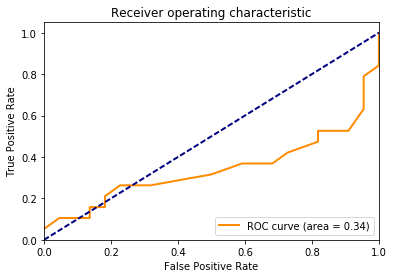

In [89]:
# classifying (random) control vs affected for females... Not filling in data points by taking into account affected_status
# affected is class 1
# fill = True, k = 2, fix = True, morePoints = True, differ = False, proteins = None


clf = RandomForestClassifier(n_estimators=30, random_state=1)
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
scores2, y_test, y_pred = usefulFunctions.testBinaryClassifier(clf, randomControlFemale, randomAffectedFemale, n=100, testSize=0.33, k=2, morePoints=True, differ=False)


In [90]:
print usefulFunctions.computeWelchTest(scores1, scores2)

Ttest_indResult(statistic=25.621904553130694, pvalue=1.6406816284549135e-64)


Total Data Points: 216
Number of Training Data Points: 82
Number of Testing Data Points: 41
Mean Accuracy: 0.657804878049
Stdev of Accuracy: 0.0579521410966
Median Accuracy: 0.658536585366
Counts for how many times each feature was filled in: {0: {0: 0, 1: 0}, 1: {0: 10, 1: 3}, 2: {0: 6, 1: 5}, 3: {0: 6, 1: 3}, 4: {0: 20, 1: 22}, 5: {0: 39, 1: 40}}
Average Feature Importances: {0: 0.1116, 1: 0.1462, 2: 0.13040000000000002, 3: 0.13149999999999998, 4: 0.17390000000000008, 5: 0.30639999999999995}
ROC Graph for Median trial


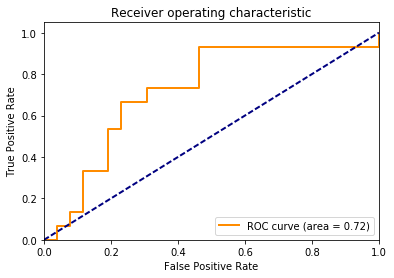

In [91]:
# classifying (random) control vs affected for females... Filling in data points by taking into account affected_status
# affected is class 1
# fill = True, k = 2, fix = True, morePoints = True, differ = True, proteins = None

clf = AdaBoostClassifier(n_estimators=100)
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
scores1, y_test, y_pred = usefulFunctions.testBinaryClassifier(clf, randomControlFemale, randomAffectedFemale, n=100, testSize=0.33, k=2, morePoints=True)


Total Data Points: 216
Number of Training Data Points: 82
Number of Testing Data Points: 41
Mean Accuracy: 0.478536585366
Stdev of Accuracy: 0.0722850228959
Median Accuracy: 0.487804878049
Counts for how many times each feature was filled in: {0: 0, 1: 13, 2: 11, 3: 9, 4: 42, 5: 79}
Average Feature Importances: {0: 0.13039999999999999, 1: 0.15750000000000006, 2: 0.13159999999999999, 3: 0.14119999999999994, 4: 0.18650000000000005, 5: 0.25279999999999991}
ROC Graph for Median trial


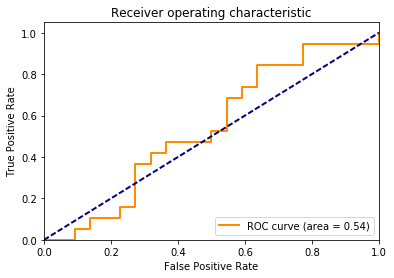

In [92]:
# classifying (random) control vs affected for females... Not Filling in data points by taking into account affected_status
# affected is class 1
# fill = True, k = 2, fix = True, morePoints = True, differ = False, proteins = None


clf = AdaBoostClassifier(n_estimators=100)
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
scores2, y_test, y_pred = usefulFunctions.testBinaryClassifier(clf, randomControlFemale, randomAffectedFemale, n=100, testSize=0.33, k=2, morePoints=True, differ=False)


In [93]:
print usefulFunctions.computeWelchTest(scores1, scores2)

Ttest_indResult(statistic=19.349483393053081, pvalue=1.0435143300030773e-46)


Total Data Points: 216
Number of Training Data Points: 62
Number of Testing Data Points: 31
Mean Accuracy: 0.694
Stdev of Accuracy: 0.078
Median Accuracy: 0.677
Here were the percentages of control vs case in each test split and how well the classifier did: 
Train : ('0.339', '0.661')
Test : ('0.290', '0.710', '0.742')


Train : ('0.419', '0.581')
Test : ('0.129', '0.871', '0.839')


Train : ('0.226', '0.774')
Test : ('0.516', '0.484', '0.613')


Train : ('0.339', '0.661')
Test : ('0.290', '0.710', '0.677')


Train : ('0.290', '0.710')
Test : ('0.387', '0.613', '0.677')


Train : ('0.306', '0.694')
Test : ('0.355', '0.645', '0.645')


Train : ('0.339', '0.661')
Test : ('0.290', '0.710', '0.742')


Train : ('0.306', '0.694')
Test : ('0.355', '0.645', '0.613')


Train : ('0.323', '0.677')
Test : ('0.323', '0.677', '0.613')


Train : ('0.323', '0.677')
Test : ('0.323', '0.677', '0.774')


Average Feature Importances: {0: '0.332', 1: '0.362', 2: '0.306'}
ROC Graph for Median trial


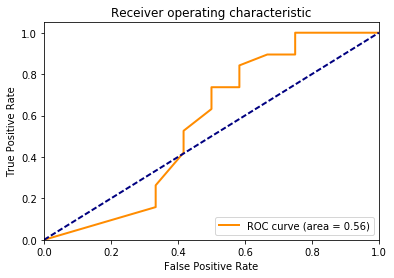

In [123]:
# classifying control vs affected for females... Filling in data points by taking into account affected_status
# affected is class 1
# fill = False, proteins = ["protein_V4","protein_V6", "protein_V8"]

clf = RandomForestClassifier(n_estimators=30, random_state=1)
proteins = ["protein_V4","protein_V6", "protein_V8"]
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
scores1, confusionMatrix = usefulFunctions.testBinaryClassifier(clf, femaleSplit[0], femaleSplit[1], n=10, testSize=0.33, fill=False, proteins=proteins)


Normalized confusion matrix
[[ 0.35  0.65]
 [ 0.14  0.86]]


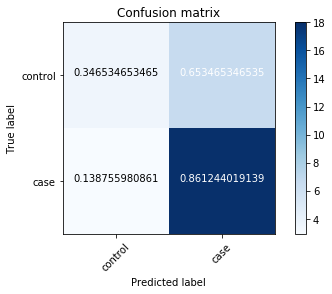

In [124]:
usefulFunctions.plot_confusion_matrix(numpy.array(confusionMatrix), ["control", "case"])
# (numpy.array(y_true), y_pred)


Total Data Points: 216
Number of Training Data Points: 62
Number of Testing Data Points: 31
Mean Accuracy: 0.402580645161
Stdev of Accuracy: 0.0161973139216
Median Accuracy: 0.387096774194
Average Feature Importances: {0: 0.1960000000000002, 1: 0.45439999999999947, 2: 0.34959999999999991}
ROC Graph for Median trial


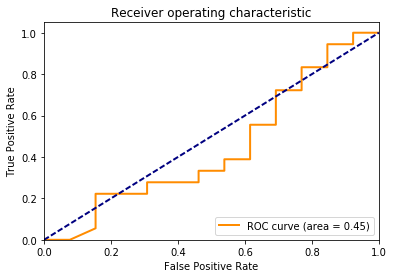

In [39]:
# classifying control vs affected for females... Filling in data points by taking into account affected_status
# affected is class 1
# fill = False, proteins = ["protein_BL", "protein_V4","protein_V6", "protein_V8"]

# clf = RandomForestClassifier(n_estimators=30, random_state=1)
clf = AdaBoostClassifier(n_estimators=100)
proteins = ["protein_V4","protein_V6", "protein_V8"]
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
scores1 = usefulFunctions.testBinaryClassifier(clf, randomControlFemale, randomAffectedFemale, n=100, testSize=0.33, fill=False, proteins=proteins)


Total Data Points: 216
Number of Training Data Points: 74
Number of Testing Data Points: 37
Mean Accuracy: 0.673
Stdev of Accuracy: 0.048
Median Accuracy: 0.649
Here were the percentages of control vs case in each test split and how well the classifier did: 
Train : ('0.324', '0.676')
Test : ('0.378', '0.622', '0.622')


Train : ('0.405', '0.595')
Test : ('0.216', '0.784', '0.649')


Train : ('0.270', '0.730')
Test : ('0.486', '0.514', '0.649')


Train : ('0.365', '0.635')
Test : ('0.297', '0.703', '0.730')


Train : ('0.297', '0.703')
Test : ('0.432', '0.568', '0.622')


Train : ('0.365', '0.635')
Test : ('0.297', '0.703', '0.649')


Train : ('0.351', '0.649')
Test : ('0.324', '0.676', '0.757')


Train : ('0.351', '0.649')
Test : ('0.324', '0.676', '0.649')


Train : ('0.338', '0.662')
Test : ('0.351', '0.649', '0.676')


Train : ('0.324', '0.676')
Test : ('0.378', '0.622', '0.730')


Average Feature Importances: {0: '0.311', 1: '0.296', 2: '0.393'}
ROC Graph for Median trial


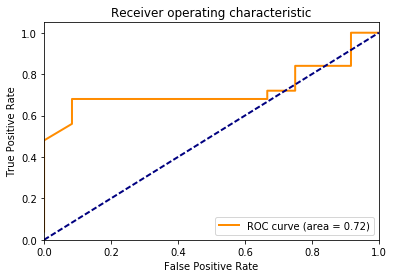

In [125]:
clf = AdaBoostClassifier(n_estimators=100)
proteins = ["protein_BL","protein_V4","protein_V6"]
print "Total Data Points: " + str(len(femaleSplit[0]) + len(femaleSplit[1]))
scores1, confusionMatrix = usefulFunctions.testBinaryClassifier(clf, femaleSplit[0], femaleSplit[1], n=10, testSize=0.33, fill=False, proteins=proteins)

Normalized confusion matrix
[[ 0.53  0.47]
 [ 0.25  0.75]]


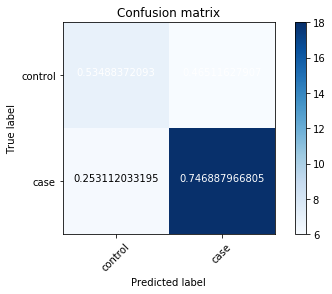

In [128]:
usefulFunctions.plot_confusion_matrix(numpy.array(confusionMatrix), ["control", "case"])


Total Data Points: 403
Number of Training Data Points: 83
Number of Testing Data Points: 42
Mean Accuracy: 0.595238095238
Stdev of Accuracy: nan
Median Accuracy: 0.595238095238
Average Feature Importances: {0: 0.25845609679628406, 1: 0.21954271055960314, 2: 0.28058511585003815, 3: 0.24141607679407459}
ROC Graph for Median trial


usefulFunctions.py:41: RuntimeWarning: invalid value encountered in double_scalars
  s = math.sqrt(s/float(len(array)-1))


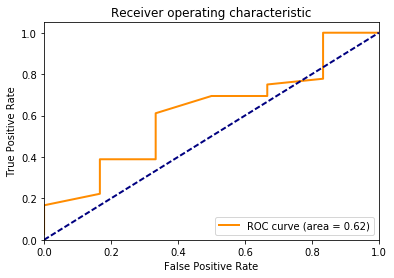

In [32]:

clf = RandomForestClassifier(n_estimators=30, random_state=1)
proteins = ["protein_V4","protein_V6","protein_V8", "protein_V10"]
print "Total Data Points: " + str(len(maleSplit[0]) + len(maleSplit[1]))
scores1 = usefulFunctions.testBinaryClassifier(clf, maleSplit[0], maleSplit[1], n=1, testSize=0.33, fill=False, proteins=proteins)


Total Data Points: 403
Number of Training Data Points: 149
Number of Testing Data Points: 74
Mean Accuracy: 0.648648648649
Stdev of Accuracy: nan
Median Accuracy: 0.648648648649
Feature Importances for Median trial: [ 0.55  0.45]
ROC Graph for Median trial


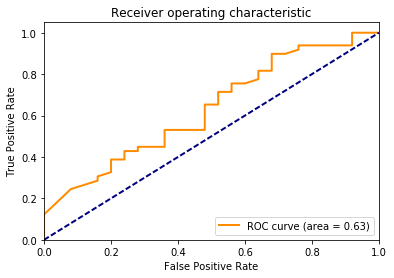

In [164]:
clf = AdaBoostClassifier(n_estimators=100)
proteins = ["protein_V4","protein_V6"]
print "Total Data Points: " + str(len(maleSplit[0]) + len(maleSplit[1]))
scores1 = usefulFunctions.testBinaryClassifier(clf, maleSplit[0], maleSplit[1], n=1, testSize=0.33, fill=False, proteins=proteins)
